In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(np.float64)

In [3]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X,y)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## Non Linear SVM classification

In [5]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [6]:
X, y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [7]:
polynomial_svm_clf.fit(X, y)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [8]:
polynomial_svm_clf.predict([[1, 0.5]])

array([0], dtype=int64)

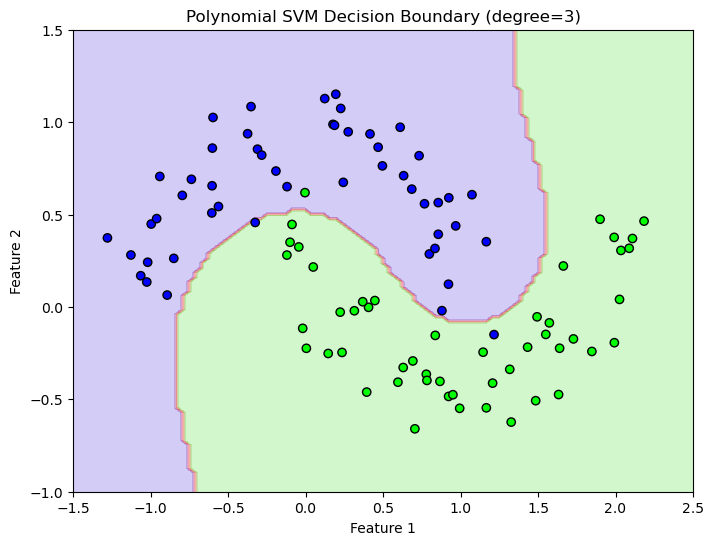

In [9]:
# Create a grid of points
x0s = np.linspace(-1.5, 2.5, 100)
x1s = np.linspace(-1, 1.5, 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_grid = np.c_[x0.ravel(), x1.ravel()]

# Predict for each point on the grid
y_pred = polynomial_svm_clf.predict(X_grid)
y_pred = y_pred.reshape(x0.shape)

# Plot the contour and data points
plt.figure(figsize=(8, 6))
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)  # Decision regions
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg, edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Polynomial SVM Decision Boundary (degree=3)")
plt.show()

## Polynomial Kernel

In [10]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

In [11]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

## Gaussian RBF kernel

In [12]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

## SVM Regression

In [13]:
from sklearn.svm import LinearSVR

In [14]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5)

In [15]:
from sklearn.svm import SVR

In [16]:
svr_nonlinear_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel = "poly", degree=2,epsilon=0.5, C=1))
])

In [17]:
svr_nonlinear_reg.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=1, degree=2, epsilon=0.5, kernel='poly'))])